## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import warnings
warnings.filterwarnings("ignore")

## Importing data....

In [2]:
df = pd.read_csv(r"D:\Portfolio Projects\movies.csv")

## Let's have a look....

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Let's see details about the data (like null values present, columns and their datatypes)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


## Data Cleaning

In [5]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


#### Detecting Outliers

In [6]:
def Detect_Outliers(data):
    outliers = []
    th = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>3:
            outliers.append(i)
    return outliers

In [7]:
Detect_Outliers(df["budget"])

[175000000.0,
 200000000.0,
 160000000.0,
 170000000.0,
 160000000.0,
 200000000.0,
 175000000.0,
 160000000.0,
 200000000.0,
 165000000.0,
 180000000.0,
 207000000.0,
 225000000.0,
 270000000.0,
 210000000.0,
 160000000.0,
 258000000.0,
 300000000.0,
 160000000.0,
 180000000.0,
 175000000.0,
 185000000.0,
 200000000.0,
 185000000.0,
 180000000.0,
 225000000.0,
 237000000.0,
 175000000.0,
 250000000.0,
 200000000.0,
 175000000.0,
 200000000.0,
 200000000.0,
 175000000.0,
 200000000.0,
 160000000.0,
 200000000.0,
 200000000.0,
 260000000.0,
 165000000.0,
 200000000.0,
 170000000.0,
 200000000.0,
 200000000.0,
 165000000.0,
 200000000.0,
 250000000.0,
 160000000.0,
 195000000.0,
 163000000.0,
 200000000.0,
 220000000.0,
 180000000.0,
 250000000.0,
 200000000.0,
 230000000.0,
 170000000.0,
 185000000.0,
 250000000.0,
 209000000.0,
 165000000.0,
 225000000.0,
 200000000.0,
 170000000.0,
 160000000.0,
 225000000.0,
 225000000.0,
 200000000.0,
 190000000.0,
 190000000.0,
 190000000.0,
 21500

Let's talk about budget column first. As we can see there are so many null values and outliers in budget column.
So, we are going to either replace them with median not with mean value.

In [8]:
value_to_replace = df['budget'].median()
df['budget'].replace(to_replace = np.nan, value = value_to_replace , inplace=True)

#### Let's have one more time look at the number of nulls values present.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [10]:
df.dropna(axis = 0, how = 'any', inplace = True)
df.reset_index(drop=True,inplace=True)

In [11]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7407,The Call of the Wild,PG,Adventure,2020,"February 21, 2020",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0
7408,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0
7409,The Quarry,R,Crime,2020,"April 17, 2020",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,20500000.0,3661.0,Prowess Pictures,98.0
7410,Tulsa,PG-13,Comedy,2020,"June 3, 2020",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,20500000.0,413378.0,Pryor Entertainment,120.0


Now , There are no nulls !!!

In [12]:
# Converting datatypes of budget and gross from float to integer
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [13]:
# Having a check on released column and preparing it for EDA

from datetime import datetime
length = df.shape[0]
for i in range(length):
    df.loc[i,['released']] = df['released'].str.split("(")[i][0].strip()
    if len(df.loc[i,['released']])>4:
        df['released'][i] = datetime.strptime(df['released'][i], '%B %d, %Y').date()

        
df['released'] = pd.to_datetime(df['released'])

In [14]:
df['released']

0      1980-06-13
1      1980-07-02
2      1980-06-20
3      1980-07-02
4      1980-07-25
          ...    
7407   2020-02-21
7408   2020-08-28
7409   2020-04-17
7410   2020-06-03
7411   2020-03-03
Name: released, Length: 7412, dtype: datetime64[ns]

In [15]:
# Correcting year column
df['year'] = df['released'].dt.year

#### Checking for duplicates

In [16]:
df[df.duplicated(subset = ['name','rating','genre','company','year'], keep = False)]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


## Performing EDA

In [17]:
# Preparing Data
df.sort_values(by = 'gross', inplace = True, ascending = False)
df.reset_index(drop = True, inplace = True)

#### Checking Correlation

In [18]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.098716,0.211309,0.279173,0.247084,0.110828
score,0.098716,1.000000,0.415190,0.058978,0.188071,0.397226
votes,0.211309,0.415190,1.000000,0.457769,0.631110,0.309945
budget,0.279173,0.058978,0.457769,1.000000,0.746065,0.273731
gross,0.247084,0.188071,0.631110,0.746065,1.000000,0.245117
runtime,0.110828,0.397226,0.309945,0.273731,0.245117,1.000000


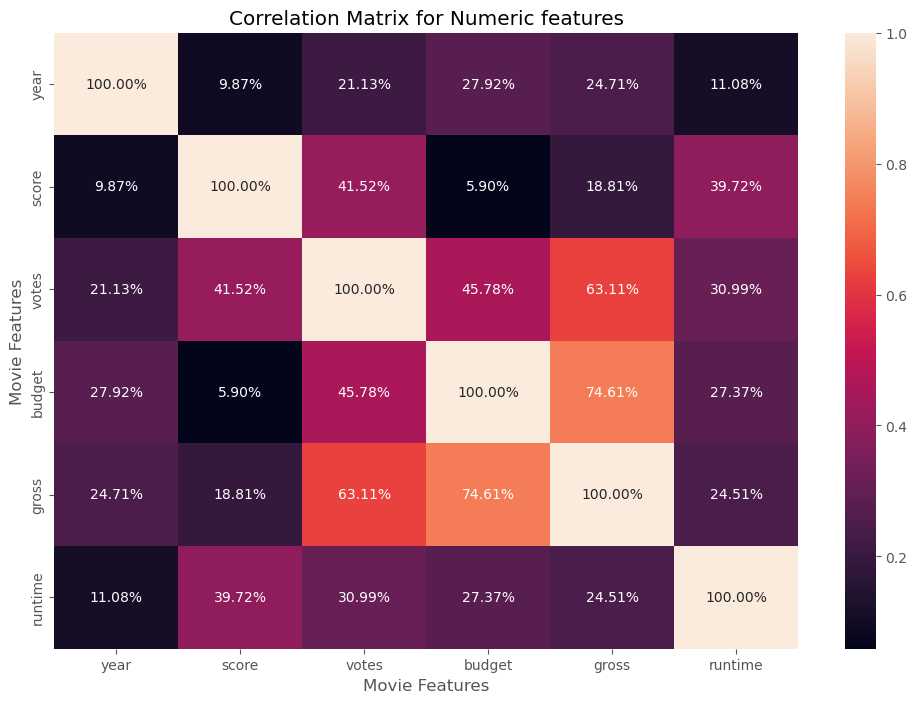

In [19]:
corr_matrix = df.corr()
sns.heatmap(data = corr_matrix, annot = True, fmt = '.2%')
plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

#### Budgets Vs Gross

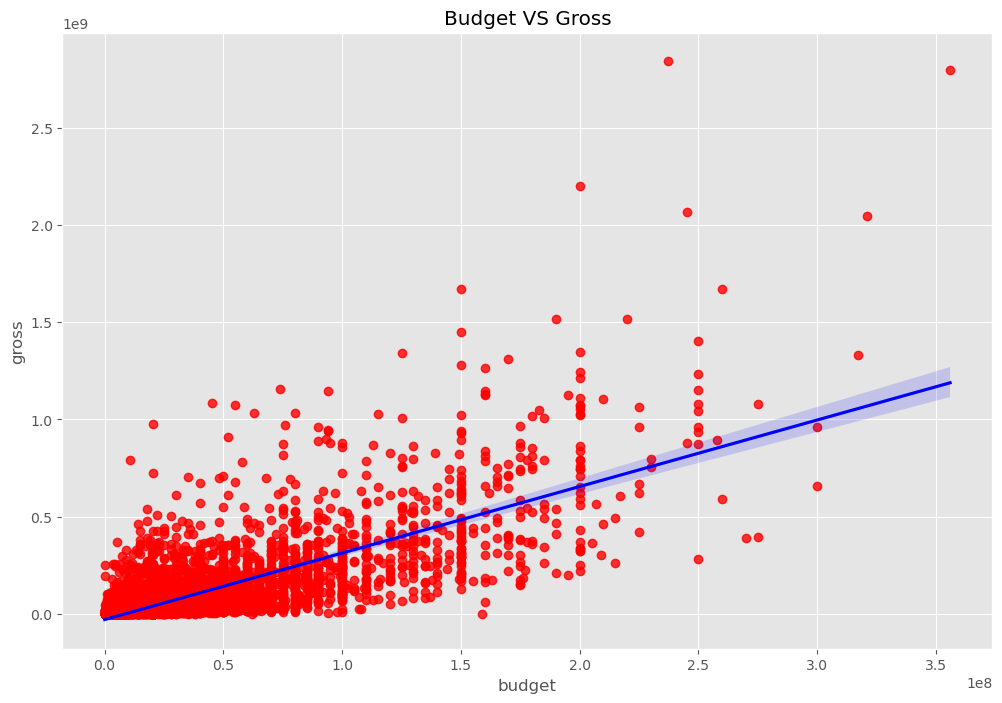

In [20]:
sns.regplot(x = 'budget', y = 'gross', data = df , scatter_kws = {'color':'red'},line_kws = {'color':'blue'})
plt.title("Budget VS Gross")
plt.show()

#### Votes Vs Gross

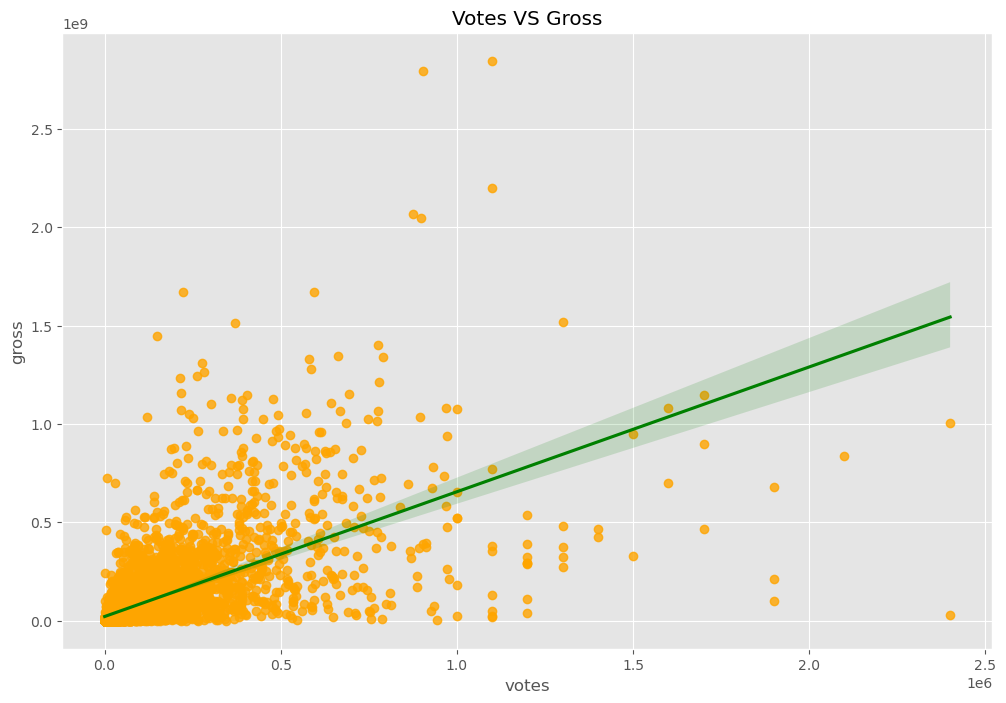

In [21]:
sns.regplot(x = 'votes', y = 'gross', data = df , scatter_kws = {'color':'orange'},line_kws = {'color':'green'})
plt.title("Votes VS Gross")
plt.show()

#### Net Gross gained by movies each year

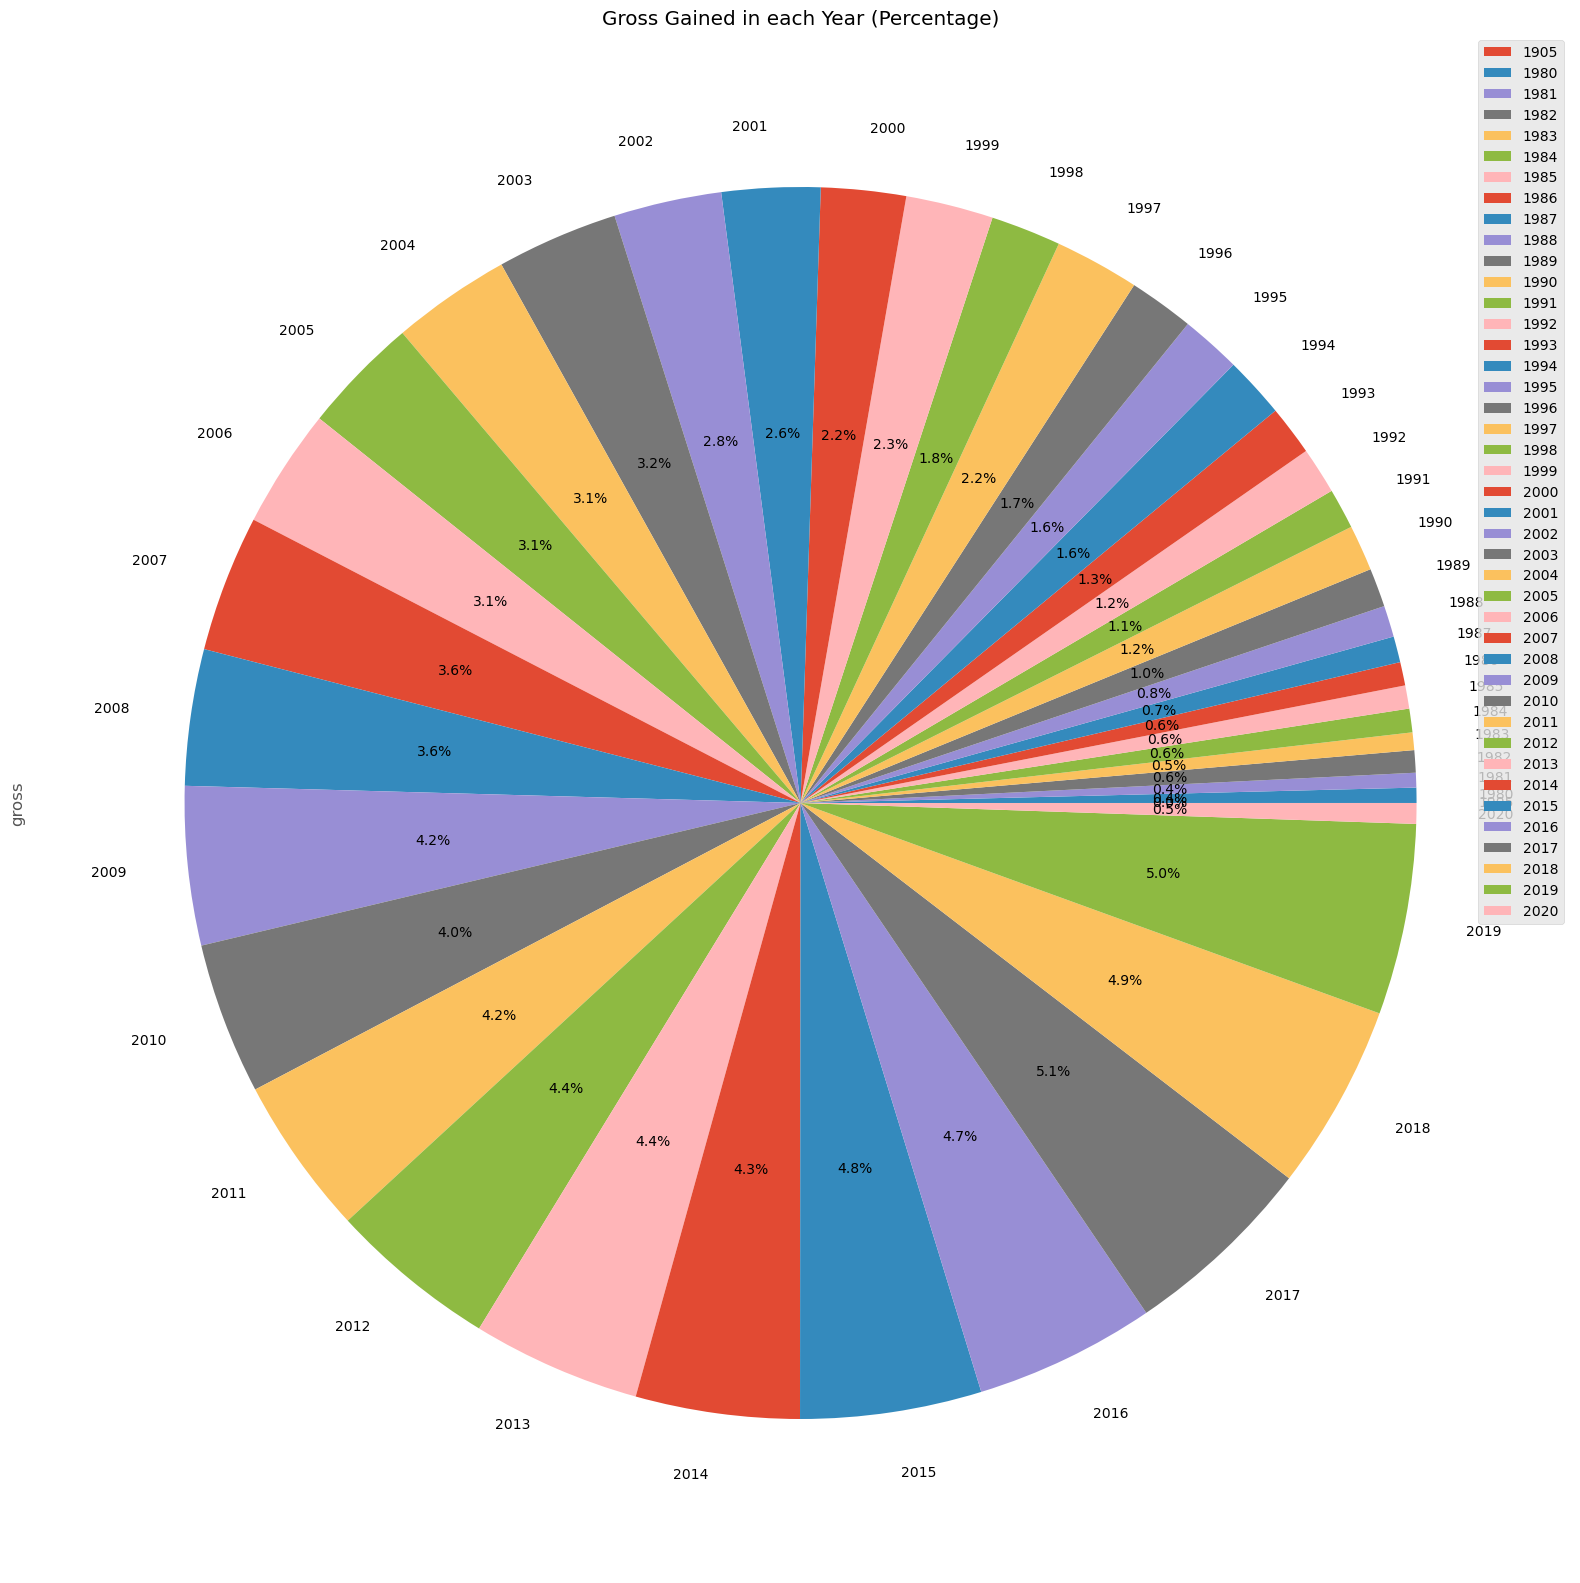

In [22]:
pie_data = df.groupby(by = 'year').sum().sort_index()
pie_data.plot.pie(y = 'gross', autopct='%1.1f%%', figsize = (20,20),title = "Gross Gained in each Year (Percentage)");